In [1]:
'''
Segment the OASIS brain data set with an Improved UNet.

@author Aghnia Prawira (45610240)
'''

import data_processing as dp
import improved_unet as iu
from importlib import reload
reload(dp)
reload(iu)

import os
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Tensorflow version: 2.1.0
Tensorflow version: 2.1.0


In [2]:
dp.test()
iu.test()

Testing data processing.
Testing improved unet.


In [3]:
# Set path to dataset
dataset_path = "keras_png_slices_data/"

seg_test_path = dataset_path + "keras_png_slices_seg_test/"
seg_train_path = dataset_path + "keras_png_slices_seg_train/"
seg_val_path = dataset_path + "keras_png_slices_seg_validate/"
test_path = dataset_path + "keras_png_slices_test/"
train_path = dataset_path + "keras_png_slices_train/"
val_path = dataset_path + "keras_png_slices_validate/"

In [4]:
# Load images
reload(dp)
seg_test = dp.load_seg(seg_test_path)
seg_train = dp.load_seg(seg_train_path)
seg_val = dp.load_seg(seg_val_path)
test = dp.load_image(test_path)
train = dp.load_image(train_path)
val = dp.load_image(val_path)

In [5]:
print(seg_test[0][:,:,1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


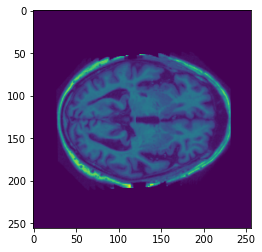

In [6]:
plt.imshow(test[0])

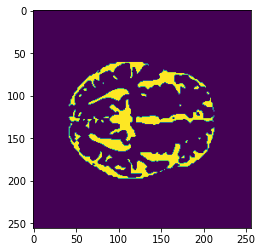

In [7]:
plt.imshow(seg_test[0][:,:,1])

In [8]:
print(np.array(train).shape)
print(np.array(seg_train).shape)

(9664, 256, 256, 1)
(9664, 256, 256, 4)


In [12]:
reload(iu)
# Generate improved unet model
model = iu.unet()

Tensorflow version: 2.1.0
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 256, 256, 16) 160         input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_26 (LeakyReLU)      (None, 256, 256, 16) 0           conv2d_27[0][0]                  
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 256, 256, 16) 2320        leaky_re_lu_26[0][0]             
__________________________________________________________________

In [13]:
# Compile the model
reload(iu)
model.compile(optimizer='adam', 
              loss='binary_crossentropy', metrics=[iu.dice_coefficient_avg])

# model.compile(optimizer='adam', 
#               loss=iu.dice_loss, metrics=[iu.dice_coefficient_avg])

Tensorflow version: 2.1.0


In [14]:
# Train the model
history = model.fit(np.array(train), np.array(seg_train), 
                    batch_size=20, epochs=5, 
                    validation_data=(np.array(val), np.array(seg_val)))

Train on 9664 samples, validate on 1120 samples
Epoch 1/5
9664/9664 [==============================] - 112s 12ms/step - loss: 0.0699 - dice_coefficient_avg: 0.9118 - val_loss: 0.0254 - val_dice_coefficient_avg: 0.9667
Epoch 2/5
9664/9664 [==============================] - 110s 11ms/step - loss: 0.0249 - dice_coefficient_avg: 0.9693 - val_loss: 0.0195 - val_dice_coefficient_avg: 0.9754
Epoch 3/5
9664/9664 [==============================] - 116s 12ms/step - loss: 0.0206 - dice_coefficient_avg: 0.9747 - val_loss: 0.0212 - val_dice_coefficient_avg: 0.9763
Epoch 4/5
9664/9664 [==============================] - 104s 11ms/step - loss: 0.0182 - dice_coefficient_avg: 0.9776 - val_loss: 0.0161 - val_dice_coefficient_avg: 0.9800
Epoch 5/5
9664/9664 [==============================] - 107s 11ms/step - loss: 0.0166 - dice_coefficient_avg: 0.9796 - val_loss: 0.0172 - val_dice_coefficient_avg: 0.9797


In [15]:
test_loss, test_acc = model.evaluate(np.array(test), np.array(seg_test), verbose=2)
print(test_acc)

0.9802643060684204


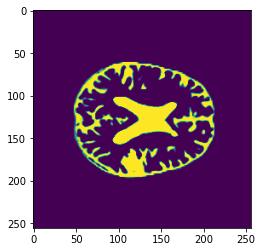

In [16]:
prediction = model.predict(np.array(test))
plt.imshow(prediction[15][:,:,1])

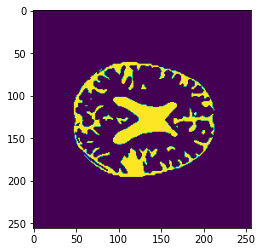

In [17]:
plt.imshow(seg_test[15][:,:,1])

In [18]:
reload(iu)
print(iu.dice_loss(np.array(seg_test), np.array(prediction)))
print(iu.dice_coefficient(np.array(seg_test), np.array(prediction)))

Tensorflow version: 2.1.0
tf.Tensor(0.019735575, shape=(), dtype=float32)
tf.Tensor(
[0.9758023  0.97569436 0.97690636 0.97686654 0.97745895 0.9778444
 0.97722477 0.97767967 0.9778817  0.9773413  0.976717   0.97701716
 0.9766836  0.9779453  0.9786127  0.9790122  0.9786659  0.97935474
 0.98046553 0.9801829  0.9808848  0.9812972  0.98036957 0.9757435
 0.98117906 0.98147047 0.9752342  0.9751481  0.9773038  0.9764743
 0.97621953 0.97578084 0.9819487  0.9811891  0.97774655 0.97757906
 0.9791821  0.9793732  0.9774771  0.9755135  0.9768977  0.97841835
 0.97920746 0.9806487  0.9803747  0.9812015  0.98097694 0.98088723
 0.981367   0.9824403  0.98110336 0.98212457 0.98211634 0.9832511
 0.9818482  0.9794405  0.9811278  0.9792184  0.9785647  0.9776028
 0.977533   0.9745766  0.9729945  0.97621274 0.9779177  0.97676724
 0.9790978  0.9795353  0.97901005 0.9780093  0.97908175 0.9789522
 0.9800528  0.98054546 0.98102885 0.9821981  0.9764632  0.9818659
 0.9827946  0.98353535 0.9822476  0.98188055 0.9809